In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1ZvbHVtZXMvSG9tZS9wZWRyb2xlaXRhby9wZWRyb2xlaXRhby5ubC9weXRob24tZm9yLXN0dWRlbnRzL2RpdmluZy1pbnRvLWRhdGE='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/importlib/_bootstrap.py": 1741034880.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/importlib/_bootstrap_external.py": 1741034880.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/zipimport.py": 1741034878.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/codecs.py": 1741034877.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/encodings/aliases.py": 1741034879.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/encodings/__init__.py": 1741034879.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/encodings/utf_8.py": 1741034879.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/abc.py": 1741034877.0, "/Volumes/Home/pedroleitao/miniconda3/envs/pedroleitao.nl/lib/python3.11/io.py": 1741034877.0, "/Volumes/Home/pedroleitao/miniconda3/envs/

In [2]:
import pandas as pd

# Read the CSV directly from the zip
earthquakes = pd.read_csv('earthquake-database.zip', compression='zip')

earthquakes.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
earthquakes.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [4]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [5]:
earthquakes['Depth Error'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23412 entries, 0 to 23411
Series name: Depth Error
Non-Null Count  Dtype  
--------------  -----  
4461 non-null   float64
dtypes: float64(1)
memory usage: 183.0 KB


In [6]:
earthquakes.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [7]:
earthquakes['Depth Error']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23407    1.2
23408    2.0
23409    1.8
23410    1.8
23411    2.2
Name: Depth Error, Length: 23412, dtype: float64

In [8]:
earthquakes = earthquakes.dropna(
    subset=['Magnitude Type'],
    ignore_index=True
)

In [9]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23409 non-null  object 
 1   Time                        23409 non-null  object 
 2   Latitude                    23409 non-null  float64
 3   Longitude                   23409 non-null  float64
 4   Type                        23409 non-null  object 
 5   Depth                       23409 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23409 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [10]:
earthquakes.duplicated(
    subset=['ID']
).sum()

0

In [11]:
earthquakes.duplicated(
    subset=['Latitude', 'Longitude']
).sum()

6

In [12]:
earthquakes = earthquakes.drop_duplicates(subset=['Latitude', 'Longitude'], ignore_index=True)

In [13]:
(earthquakes['Horizontal Error'] > 90).sum()

14

In [14]:
earthquakes = earthquakes.drop(
    earthquakes[earthquakes['Horizontal Error'] > 90].index
).reset_index(drop=True)

In [15]:
(earthquakes['Horizontal Error'] > 90).sum()

0

In [16]:
earthquakes['Magnitude'].describe()

count    23389.000000
mean         5.882655
std          0.423149
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

In [17]:
earthquakes['Magnitude'].mean()

5.882655094275087

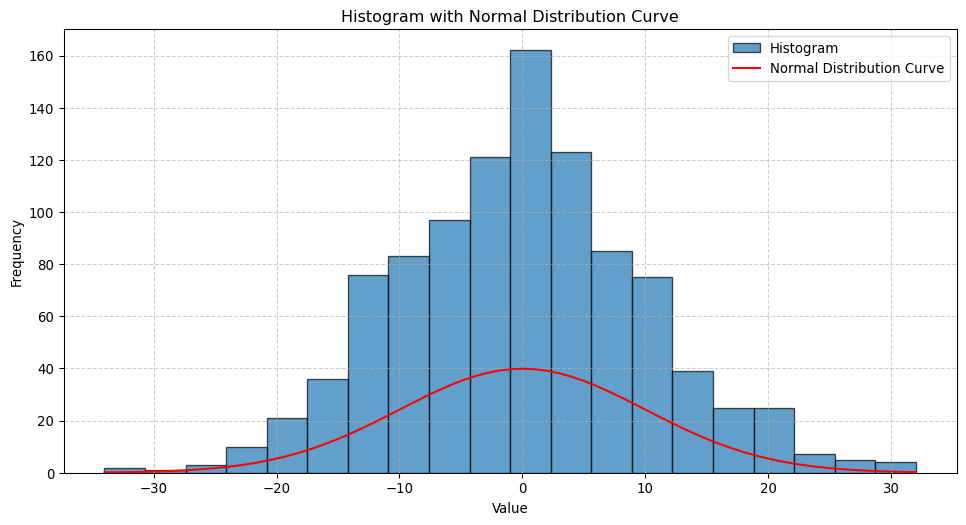

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate normally distributed integers
normal_integers = np.random.normal(loc=0, scale=10, size=1000)
normal_integers = np.round(normal_integers).astype(int)

# Generate data for the line (fitted normal distribution)
x = np.arange(min(normal_integers), max(normal_integers) + 1)
pdf = norm.pdf(x, loc=0, scale=10)  # Normal PDF based on the original distribution
pdf_scaled = pdf * len(normal_integers) * (x[1] - x[0])  # Scale to match histogram

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(normal_integers, bins=20, edgecolor='black', alpha=0.7, label='Histogram')

# Overlay the line
plt.plot(x, pdf_scaled, color='red', label='Normal Distribution Curve')

# Add labels and title
plt.title('Histogram with Normal Distribution Curve')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [19]:
earthquakes['Magnitude'].value_counts(bins=4)

(5.495, 6.4]    21084
(6.4, 7.3]       2023
(7.3, 8.2]        269
(8.2, 9.1]         13
Name: count, dtype: int64

<Axes: title={'center': 'Earthquakes Magnitude Distribution'}, ylabel='Frequency'>

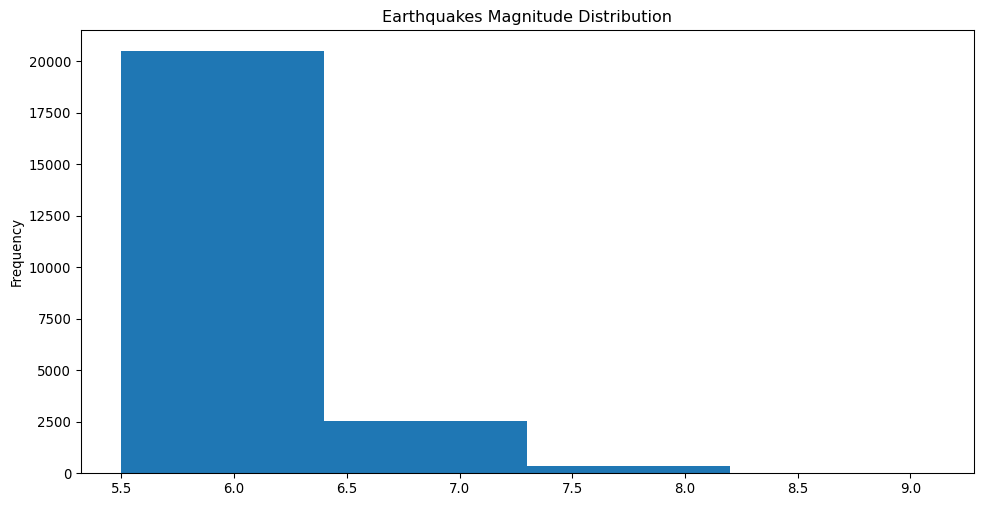

In [20]:
earthquakes['Magnitude'].plot(
    kind='hist',
    bins=4,
    title='Earthquakes Magnitude Distribution',
    figsize=(12, 6)
)

In [21]:
earthquakes[
    ['Magnitude', 'Depth']
].corr()

,Magnitude,Depth
Magnitude,1.000000,0.023299
Depth,0.023299,1.000000


In [22]:
earthquakes[
    ['Magnitude', 'Depth', 'Horizontal Error']
].corr()

,Magnitude,Depth,Horizontal Error
Magnitude,1.000000,0.023299,-0.128781
Depth,0.023299,1.000000,0.146771
Horizontal Error,-0.128781,0.146771,1.000000


<Axes: title={'center': 'Earthquake Depth vs. Horizontal Error'}, xlabel='Depth', ylabel='Horizontal Error'>

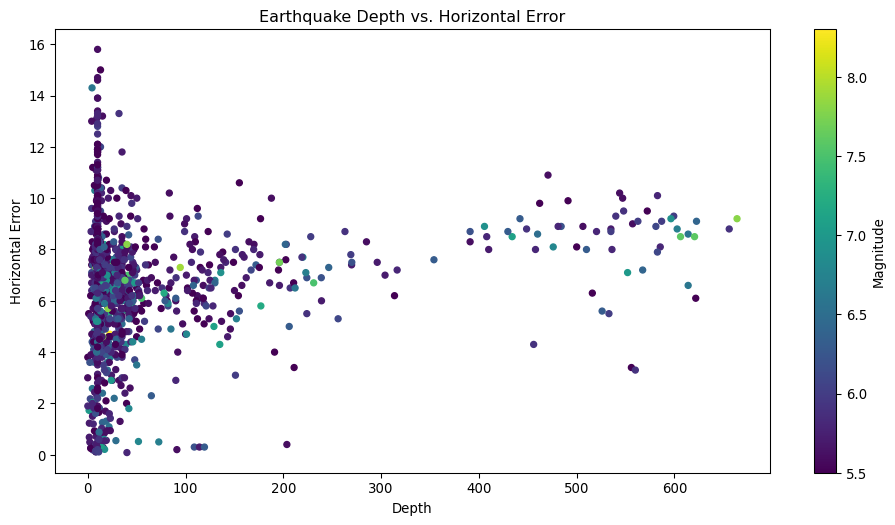

In [23]:
earthquakes.plot(
    kind='scatter',
    x='Depth',
    y='Horizontal Error',
    title='Earthquake Depth vs. Horizontal Error',
    cmap='viridis',
    c='Magnitude',
    figsize=(12, 6)
)

In [24]:
earthquakes.groupby(
    'Type'
)['Magnitude'].mean()

Type
Earthquake           5.882775
Explosion            5.850000
Nuclear Explosion    5.864417
Rock Burst           6.200000
Name: Magnitude, dtype: float64

In [25]:
# Pivot Type and Magnitude
earthquakes.pivot_table(
    values='Magnitude',
    index=['Type', 'Source'],
    aggfunc='mean'
)

Magnitude
Type              Source              
Earthquake        AK          5.858333
                  CI          6.037778
                  GCMT        5.885455
                  ISCGEM      6.007805
                  ISCGEMSUP   6.000833
                  NC          6.029804
                  NN          5.725000
                  OFFICIAL    8.712500
                  PR          5.800000
                  SE          5.800000
                  US          5.865256
                  UW          5.966667
Explosion         US          5.850000
Nuclear Explosion US          5.864417
Rock Burst        US          6.200000

In [26]:
earthquakes['Date'] = pd.to_datetime(
    earthquakes['Date'],
    format='%m/%d/%Y',
    errors='coerce'
)

In [27]:
earthquakes['Year'] = earthquakes['Date'].dt.year

In [28]:
earthquakes['Year']

0        1965.0
1        1965.0
2        1965.0
3        1965.0
4        1965.0
          ...  
23384    2016.0
23385    2016.0
23386    2016.0
23387    2016.0
23388    2016.0
Name: Year, Length: 23389, dtype: float64

In [29]:
# Fill NaN values before converting
earthquakes['Year'] = earthquakes['Year'].fillna(0).astype(int)

earthquakes['Year']

0        1965
1        1965
2        1965
3        1965
4        1965
         ... 
23384    2016
23385    2016
23386    2016
23387    2016
23388    2016
Name: Year, Length: 23389, dtype: int64

In [30]:
earthquakes[earthquakes['Year'] == 1972]['Magnitude'].mean()

5.943814432989692

<Axes: title={'center': 'Earthquakes in 1972'}, xlabel='Date', ylabel='Magnitude'>

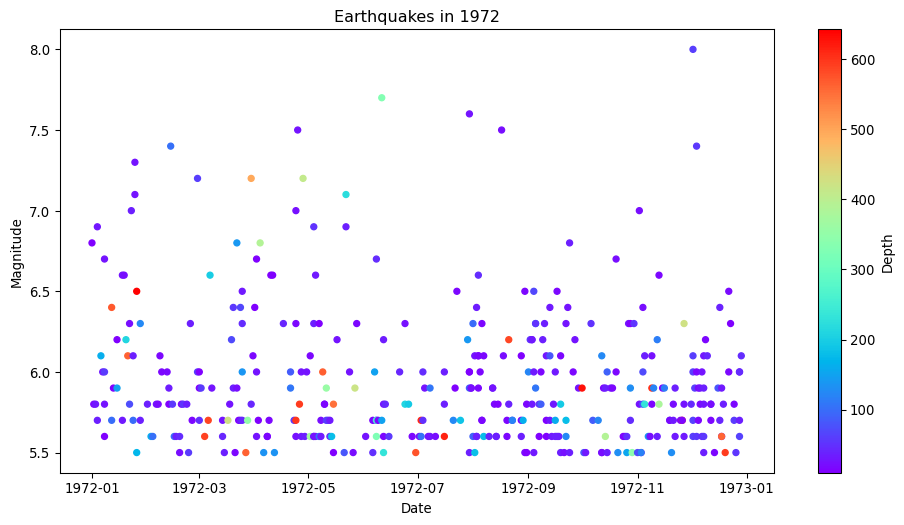

In [31]:
earthquakes[earthquakes['Year'] == 1972].plot(
    kind='scatter',
    x='Date',
    y='Magnitude',
    title='Earthquakes in 1972',
    colormap='rainbow',
    c='Depth',
    figsize=(12, 6)
)

<Axes: title={'center': 'Average Earthquake Magnitude per Year'}, xlabel='Date', ylabel='Average Magnitude'>

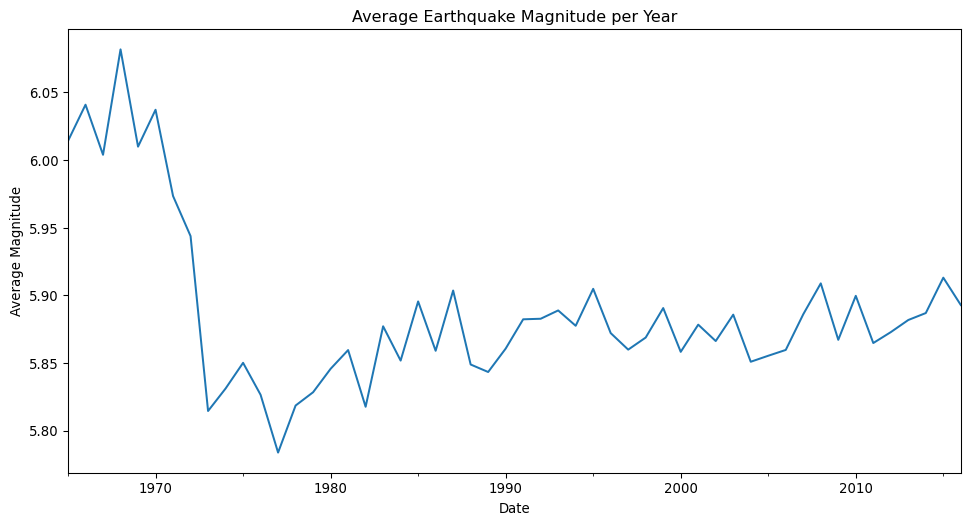

In [32]:
avg_magnitude_per_year = earthquakes.resample(
    rule='YE',
    on='Date'
)['Magnitude'].mean()

avg_magnitude_per_year.plot(
    kind='line',
    title='Average Earthquake Magnitude per Year',
    ylabel='Average Magnitude',
    figsize=(12, 6)
)

In [33]:
avg_magnitude_per_year.head(5)

Date
1965-12-31    6.014159
1966-12-31    6.040948
1967-12-31    6.003922
1968-12-31    6.081848
1969-12-31    6.009938
Name: Magnitude, dtype: float64

In [34]:
azores_earthquakes = earthquakes[
    earthquakes['Latitude'].between(36, 42) &
    earthquakes['Longitude'].between(-31, -24)
]

azores_earthquakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year
5381,1980-01-01,16:42:40,38.815,-27.780,Earthquake,10.0,NaN,NaN,6.7,MS,...,NaN,NaN,NaN,NaN,USP00014TU,US,US,US,Reviewed,1980
9065,1988-07-22,21:16:04,39.862,-29.589,Earthquake,10.0,NaN,NaN,5.5,MW,...,NaN,NaN,NaN,1.00,USP0003J40,US,US,HRV,Reviewed,1988
9230,1988-11-21,16:55:53,37.938,-26.142,Earthquake,10.8,2.9,NaN,5.9,MW,...,NaN,NaN,NaN,0.90,USP0003P1Z,US,US,HRV,Reviewed,1988
9301,1989-01-21,02:52:20,38.147,-26.243,Earthquake,10.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,0.80,USP0003R1R,US,US,HRV,Reviewed,1989
9512,1989-06-26,10:38:39,39.112,-28.242,Earthquake,11.3,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,1.10,USP0003WP5,US,US,NC,Reviewed,1989
12920,1996-03-09,22:35:38,37.034,-24.374,Earthquake,10.0,NaN,NaN,5.7,MWC,...,NaN,NaN,NaN,1.20,USP0007EJ0,US,US,HRV,Reviewed,1996
13564,1997-06-27,04:39:53,38.334,-26.684,Earthquake,10.0,NaN,NaN,5.9,MWC,...,NaN,NaN,NaN,1.09,USP0008416,US,US,HRV,Reviewed,1997
14010,1998-07-09,05:19:07,38.650,-28.626,Earthquake,10.0,NaN,NaN,6.2,MWB,...,NaN,NaN,NaN,0.98,USP0008R70,US,US,US,Reviewed,1998
16548,2003-12-23,14:02:04,40.135,-29.692,Earthquake,10.0,NaN,282.0,5.6,MWC,...,60.8,NaN,NaN,0.91,USP000CFW0,US,US,HRV,Reviewed,2003
18364,2007-04-05,03:56:50,37.306,-24.621,Earthquake,14.0,NaN,627.0,6.3,MWC,...,23.5,NaN,NaN,0.82,USP000F8R5,US,US,GCMT,Reviewed,2007


In [35]:
azores_min_magnitude = azores_earthquakes['Magnitude'].min()
azores_max_magnitude = azores_earthquakes['Magnitude'].max()
azores_mean_magnitude = azores_earthquakes['Magnitude'].mean()

azores_min_magnitude, azores_max_magnitude, azores_mean_magnitude

(5.5, 6.7, 5.95)

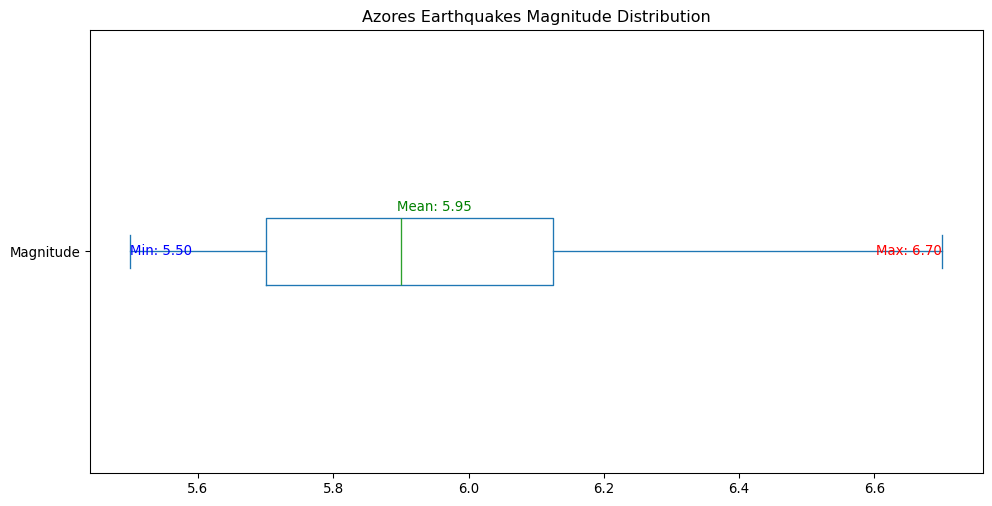

In [36]:
azores_earthquakes['Magnitude'].plot(
    kind='box',
    title='Azores Earthquakes Magnitude Distribution',
    figsize=(12, 6),
    vert=False
)

plt.text(azores_min_magnitude, 1, f'Min: {azores_min_magnitude:.2f}', va='center', ha='left', color='blue')
plt.text(azores_max_magnitude, 1, f'Max: {azores_max_magnitude:.2f}', va='center', ha='right', color='red')
plt.text(azores_mean_magnitude, 1.1, f'Mean: {azores_mean_magnitude:.2f}', va='center', ha='center', color='green')
plt.show()

In [37]:
import folium

# Create a map centered around the Azores
azores_map = folium.Map(
    location=[38, -28],
    zoom_start=6.5
)

# Add markers for each earthquake
for _, row in azores_earthquakes.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'],  # Scale the circle size by magnitude
        color='blue',
        fill=True,
        fill_opacity=0.3,
        popup=f"Year: {int(row['Year'])} Magnitude: {row['Magnitude']}, Depth: {row['Depth']} km"
    ).add_to(azores_map)

# Display the map
azores_map